<a href="https://colab.research.google.com/github/LadyPary/DataMiningAssignments/blob/main/DM_HW2Part2_ZahraRabbany_610398124.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

_______
# **<center> Data Mining </center>**
### **<center> Assignment No. 2 (Part 2)</center>**

#### <center>Zahra Rabbany Khorasgani</center> 
<center>610398124</center>

#### <center>Prof. Hedieh Sajedi</center>
#### <center>Department of Computer Science, Tehran University</center>

#### <center>April 2022</center>
_______



## **Importing**

In [ ]:
#Necessary packages

# For computations
import pandas as pd
import numpy as np

# For visualisations
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

from sklearn.decomposition import PCA

#**Part 2: Parkinson's Disease Classification Data Set**

**Attribute Information:**

Various speech signal processing algorithms including Time Frequency Features, Mel Frequency Cepstral Coefficients (MFCCs), Wavelet Transform based Features, Vocal Fold Features and TWQT features have been applied to the speech recordings of Parkinson's Disease (PD) patients to extract clinically useful information for PD assessment.

### **1.1. Load and Seperate RiskLevel**

In [ ]:
# loading data
df = pd.read_csv('https://raw.githubusercontent.com/LadyPary/DataMiningAssignments/main/HW2/pd_speech_features2.csv')

In [ ]:
df.shape

(756, 755)

In [ ]:
# printing the dataframe
df

,id,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
0,0,1,0.85247,0.71826,0.57227,240,239,0.008064,0.000087,0.00218,...,1.5620,2.6445,3.8686,4.2105,5.1221,4.4625,2.6202,3.0004,18.9405,1
1,0,1,0.76686,0.69481,0.53966,234,233,0.008258,0.000073,0.00195,...,1.5589,3.6107,23.5155,14.1962,11.0261,9.5082,6.5245,6.3431,45.1780,1
2,0,1,0.85083,0.67604,0.58982,232,231,0.008340,0.000060,0.00176,...,1.5643,2.3308,9.4959,10.7458,11.0177,4.8066,2.9199,3.1495,4.7666,1
3,1,0,0.41121,0.79672,0.59257,178,177,0.010858,0.000183,0.00419,...,3.7805,3.5664,5.2558,14.0403,4.2235,4.6857,4.8460,6.2650,4.0603,1
4,1,0,0.32790,0.79782,0.53028,236,235,0.008162,0.002669,0.00535,...,6.1727,5.8416,6.0805,5.7621,7.7817,11.6891,8.2103,5.0559,6.1164,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,250,0,0.80903,0.56355,0.28385,417,416,0.004627,0.000052,0.00064,...,3.0706,3.0190,3.1212,2.4921,3.5844,3.5400,3.3805,3.2003,6.8671,0
752,250,0,0.16084,0.56499,0.59194,415,413,0.004550,0.000220,0.00143,...,1.9704,1.7451,1.8277,2.4976,5.2981,4.2616,6.3042,10.9058,28.4170,0
753,251,0,0.88389,0.72335,0.46815,381,380,0.005069,0.000103,0.00076,...,51.5607,44.4641,26.1586,6.3076,2.8601,2.5361,3.5377,3.3545,5.0424,0
754,251,0,0.83782,0.74890,0.49823,340,339,0.005679,0.000055,0.00092,...,19.1607,12.8312,8.9434,2.2044,1.9496,1.9664,2.6801,2.8332,3.7131,0


In [ ]:
df.head()

,id,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
0,0,1,0.85247,0.71826,0.57227,240,239,0.008064,0.000087,0.00218,...,1.5620,2.6445,3.8686,4.2105,5.1221,4.4625,2.6202,3.0004,18.9405,1
1,0,1,0.76686,0.69481,0.53966,234,233,0.008258,0.000073,0.00195,...,1.5589,3.6107,23.5155,14.1962,11.0261,9.5082,6.5245,6.3431,45.1780,1
2,0,1,0.85083,0.67604,0.58982,232,231,0.008340,0.000060,0.00176,...,1.5643,2.3308,9.4959,10.7458,11.0177,4.8066,2.9199,3.1495,4.7666,1
3,1,0,0.41121,0.79672,0.59257,178,177,0.010858,0.000183,0.00419,...,3.7805,3.5664,5.2558,14.0403,4.2235,4.6857,4.8460,6.2650,4.0603,1
4,1,0,0.32790,0.79782,0.53028,236,235,0.008162,0.002669,0.00535,...,6.1727,5.8416,6.0805,5.7621,7.7817,11.6891,8.2103,5.0559,6.1164,1


In [ ]:
# description of data
df.describe()

,id,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
count,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,...,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000
mean,125.500000,0.515873,0.746284,0.700414,0.489058,323.972222,322.678571,0.006360,0.000383,0.002324,...,26.237251,22.840337,18.587888,13.872018,12.218953,12.375335,14.799230,14.751559,31.481110,0.746032
std,72.793721,0.500079,0.169294,0.069718,0.137442,99.219059,99.402499,0.001826,0.000728,0.002628,...,42.220693,32.626464,25.537464,20.046029,17.783642,16.341665,15.722502,14.432979,34.230991,0.435568
min,0.000000,0.000000,0.041551,0.543500,0.154300,2.000000,1.000000,0.002107,0.000011,0.000210,...,1.509800,1.531700,1.582900,1.747200,1.789500,1.628700,1.861700,1.955900,2.364000,0.000000
25%,62.750000,0.000000,0.762833,0.647053,0.386537,251.000000,250.000000,0.005003,0.000049,0.000970,...,2.408675,3.452800,3.354825,3.077450,2.937025,3.114375,3.665925,3.741275,3.948750,0.000000
50%,125.500000,1.000000,0.809655,0.700525,0.484355,317.000000,316.000000,0.006048,0.000077,0.001495,...,5.586300,7.062750,6.077400,4.770850,4.300450,4.741450,6.725700,7.334250,10.637250,1.000000
75%,188.250000,1.000000,0.834315,0.754985,0.586515,384.250000,383.250000,0.007528,0.000171,0.002520,...,28.958075,29.830850,21.944050,13.188000,10.876150,12.201325,21.922050,22.495175,61.125325,1.000000
max,251.000000,1.000000,0.907660,0.852640,0.871230,907.000000,905.000000,0.012966,0.003483,0.027750,...,239.788800,203.311300,121.542900,102.207000,85.571700,73.532200,62.007300,57.544300,156.423700,1.000000


In [ ]:
df.tail()

,id,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
751,250,0,0.80903,0.56355,0.28385,417,416,0.004627,0.000052,0.00064,...,3.0706,3.0190,3.1212,2.4921,3.5844,3.5400,3.3805,3.2003,6.8671,0
752,250,0,0.16084,0.56499,0.59194,415,413,0.004550,0.000220,0.00143,...,1.9704,1.7451,1.8277,2.4976,5.2981,4.2616,6.3042,10.9058,28.4170,0
753,251,0,0.88389,0.72335,0.46815,381,380,0.005069,0.000103,0.00076,...,51.5607,44.4641,26.1586,6.3076,2.8601,2.5361,3.5377,3.3545,5.0424,0
754,251,0,0.83782,0.74890,0.49823,340,339,0.005679,0.000055,0.00092,...,19.1607,12.8312,8.9434,2.2044,1.9496,1.9664,2.6801,2.8332,3.7131,0
755,251,0,0.81304,0.76471,0.46374,340,339,0.005676,0.000037,0.00078,...,62.9927,21.8152,9.2457,4.8555,3.0551,3.0415,4.0116,2.6217,3.1527,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Columns: 755 entries, id to class
dtypes: float64(749), int64(6)
memory usage: 4.4 MB


In [ ]:
df.dtypes

id                             int64
gender                         int64
PPE                          float64
DFA                          float64
RPDE                         float64
                              ...   
tqwt_kurtosisValue_dec_33    float64
tqwt_kurtosisValue_dec_34    float64
tqwt_kurtosisValue_dec_35    float64
tqwt_kurtosisValue_dec_36    float64
class                          int64
Length: 755, dtype: object

### **1.2. Data preprocessing**

#### **1.2.1. Missing Values**

In [ ]:
#Missing Valuse
df.isnull().sum() # no missing values

id                           0
gender                       0
PPE                          0
DFA                          0
RPDE                         0
                            ..
tqwt_kurtosisValue_dec_33    0
tqwt_kurtosisValue_dec_34    0
tqwt_kurtosisValue_dec_35    0
tqwt_kurtosisValue_dec_36    0
class                        0
Length: 755, dtype: int64

In [ ]:
sum(df.isnull().sum())

0

#### **1.2.2. Duplicated Values**

In [ ]:
#Duplicated values 
duplicated_val = df.duplicated() 
duplicated_val 

0      False
1      False
2      False
3      False
4      False
       ...  
751    False
752    False
753    False
754    False
755    False
Length: 756, dtype: bool

In [ ]:
any(duplicated_val) #have duplicate

True

In [ ]:
#dropping duplicated values
df = df.drop_duplicates()
df.shape

(755, 755)

In [ ]:
df.drop(columns='id') #hint
df.drop(columns='gender') #hint

,id,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,locAbsJitter,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
0,0,0.85247,0.71826,0.57227,240,239,0.008064,0.000087,0.00218,0.000018,...,1.5620,2.6445,3.8686,4.2105,5.1221,4.4625,2.6202,3.0004,18.9405,1
1,0,0.76686,0.69481,0.53966,234,233,0.008258,0.000073,0.00195,0.000016,...,1.5589,3.6107,23.5155,14.1962,11.0261,9.5082,6.5245,6.3431,45.1780,1
2,0,0.85083,0.67604,0.58982,232,231,0.008340,0.000060,0.00176,0.000015,...,1.5643,2.3308,9.4959,10.7458,11.0177,4.8066,2.9199,3.1495,4.7666,1
3,1,0.41121,0.79672,0.59257,178,177,0.010858,0.000183,0.00419,0.000046,...,3.7805,3.5664,5.2558,14.0403,4.2235,4.6857,4.8460,6.2650,4.0603,1
4,1,0.32790,0.79782,0.53028,236,235,0.008162,0.002669,0.00535,0.000044,...,6.1727,5.8416,6.0805,5.7621,7.7817,11.6891,8.2103,5.0559,6.1164,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,250,0.80903,0.56355,0.28385,417,416,0.004627,0.000052,0.00064,0.000003,...,3.0706,3.0190,3.1212,2.4921,3.5844,3.5400,3.3805,3.2003,6.8671,0
752,250,0.16084,0.56499,0.59194,415,413,0.004550,0.000220,0.00143,0.000006,...,1.9704,1.7451,1.8277,2.4976,5.2981,4.2616,6.3042,10.9058,28.4170,0
753,251,0.88389,0.72335,0.46815,381,380,0.005069,0.000103,0.00076,0.000004,...,51.5607,44.4641,26.1586,6.3076,2.8601,2.5361,3.5377,3.3545,5.0424,0
754,251,0.83782,0.74890,0.49823,340,339,0.005679,0.000055,0.00092,0.000005,...,19.1607,12.8312,8.9434,2.2044,1.9496,1.9664,2.6801,2.8332,3.7131,0


In [ ]:
df

,id,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
0,0,1,0.85247,0.71826,0.57227,240,239,0.008064,0.000087,0.00218,...,1.5620,2.6445,3.8686,4.2105,5.1221,4.4625,2.6202,3.0004,18.9405,1
1,0,1,0.76686,0.69481,0.53966,234,233,0.008258,0.000073,0.00195,...,1.5589,3.6107,23.5155,14.1962,11.0261,9.5082,6.5245,6.3431,45.1780,1
2,0,1,0.85083,0.67604,0.58982,232,231,0.008340,0.000060,0.00176,...,1.5643,2.3308,9.4959,10.7458,11.0177,4.8066,2.9199,3.1495,4.7666,1
3,1,0,0.41121,0.79672,0.59257,178,177,0.010858,0.000183,0.00419,...,3.7805,3.5664,5.2558,14.0403,4.2235,4.6857,4.8460,6.2650,4.0603,1
4,1,0,0.32790,0.79782,0.53028,236,235,0.008162,0.002669,0.00535,...,6.1727,5.8416,6.0805,5.7621,7.7817,11.6891,8.2103,5.0559,6.1164,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,250,0,0.80903,0.56355,0.28385,417,416,0.004627,0.000052,0.00064,...,3.0706,3.0190,3.1212,2.4921,3.5844,3.5400,3.3805,3.2003,6.8671,0
752,250,0,0.16084,0.56499,0.59194,415,413,0.004550,0.000220,0.00143,...,1.9704,1.7451,1.8277,2.4976,5.2981,4.2616,6.3042,10.9058,28.4170,0
753,251,0,0.88389,0.72335,0.46815,381,380,0.005069,0.000103,0.00076,...,51.5607,44.4641,26.1586,6.3076,2.8601,2.5361,3.5377,3.3545,5.0424,0
754,251,0,0.83782,0.74890,0.49823,340,339,0.005679,0.000055,0.00092,...,19.1607,12.8312,8.9434,2.2044,1.9496,1.9664,2.6801,2.8332,3.7131,0


In [ ]:
print(df[df['class'] == 1].shape)
print(df[df['class'] == 0].shape)

(563, 755)
(192, 755)


### **1.3. Shuffle data and split train/test data**

In [ ]:
y = df['class']
X = df.drop('class',axis=1)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123, shuffle = True)

#### **1.3.1. Standardizing features**

In [ ]:
#using StandardScaler to Standardizing X
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test= scaler.transform(X_test)

### **1.4. Model with all 1's as outcomes.**

In [ ]:
#Accuracy = (TP + TN) / (TP + FN + FP + TN)

print("number of 1 in y_train: ",y_train.sum())
print("y_train shape: ",y_train.shape[0])
print("number of 1 in y_test: ",y_test.sum())
print("y_test shape: ",y_test.shape[0])

#Accuracy = (TP + TN) / (TP + FN + FP + TN)
train_acc = (392 + 0) / (392 + 0 + (528 - 392) + 0)
test_acc = (171 + 0) / (171 + 0 + (227 - 171) + 0)

#train_acc = round((y_train.sum()/y_train.shape[0])*100, 2)
#test_acc = round((y_test.sum()/y_test.shape[0])*100, 2)

print("train_acc: ", train_acc)
print("test_acc: ", test_acc)

number of 1 in y_train:  392
y_train shape:  528
number of 1 in y_test:  171
y_test shape:  227
train_acc:  0.7424242424242424
test_acc:  0.7533039647577092


In [ ]:
#confusion matrix if we predict all samples as 1:
y_pred_1 = y_test.replace(0, 1)
print(confusion_matrix(y_test, y_pred_1))

[[  0  56]
 [  0 171]]


We can see that the accuracy metric alone fails to determine if a model has predictive power! The accuracy of 75% on the test dataset is not a bad accuracy and it's definitely better than a random guess. So if we only look at this metric we might think we have built a good model that can make predictions with 75% accuracy. However, we know that in reality we did not predict any class 0 instances and we predicted all examples in this class wrong! Therefore, in order to prevent such mistakes, we need to look at other metrics, more specifically we need to look at the percentages of correct predictions in each class separately.


### **1.5. Classification**
**Before Feature Extraction Using PCA**

1. *   Classification Model
   *   Confusion Matrix
   *   Train/Test Accuracy
   *   Classification Report

For both before and after parameter tuning using cross validation

In [ ]:
accTable = {'Classification': ["Decision Tree","Decision Tree","KNN","KNN","SVM","SVM","Random Forest","Random Forest"],
            'ParameterTuning': ["before", "after","before", "after","before", "after","before", "after"],
            'Accuracy': [0 for i in range(8)],
            'Train accuracy': [0 for i in range(8)],
            'Test accuracy': [0 for i in range(8)]}

accDF = pd.DataFrame(data=accTable)

#### **1.5.1. Decision Tree**

In [ ]:
decision_tree = DecisionTreeClassifier() #criterion{“gini”, “entropy”}, default=”gini”
decision_tree.fit(X_train, y_train)

y_pred = decision_tree.predict(X_test)
dt_cm = confusion_matrix(y_test, y_pred)
print('decision_tree confusion_matrix :\n', dt_cm)
accDF.iat[0, 2]= round(accuracy_score(y_test, y_pred)* 100, 2)
accDF.iat[0, 3]= round(decision_tree.score(X_train,y_train)* 100, 2)
accDF.iat[0, 4]= round(decision_tree.score(X_test,y_test)* 100, 2)

print('Accuracy:', accDF.iat[0, 2] ,'%')
print("Train accuracy:",accDF.iat[0, 3],'%')
print("Test accuracy:",accDF.iat[0, 4],'%')
print("classification_report:\n",classification_report(y_test, decision_tree.predict(X_test)))

decision_tree confusion_matrix :
 [[ 39  17]
 [ 18 153]]
Accuracy: 84.58 %
Train accuracy: 100 %
Test accuracy: 84.58 %
classification_report:
               precision    recall  f1-score   support

           0       0.68      0.70      0.69        56
           1       0.90      0.89      0.90       171

    accuracy                           0.85       227
   macro avg       0.79      0.80      0.79       227
weighted avg       0.85      0.85      0.85       227



**Decision Tree Parameter tuning using Cross Validation**

In [ ]:
tree_param_grid = {'max_features': ['auto', 'sqrt', 'log2'],
              'ccp_alpha': [0.1, .01, .001],
              'max_depth' : [5, 6, 7, 8, 9],
              'criterion' :['gini', 'entropy']
             }
tree_model = DecisionTreeClassifier(random_state=42)
tree_grid_search = GridSearchCV(estimator=tree_model, param_grid=tree_param_grid, cv=5, verbose=-1)
tree_grid_search.fit(X_train, y_train)
tree_grid_search.best_params_


{'ccp_alpha': 0.01,
 'criterion': 'gini',
 'max_depth': 6,
 'max_features': 'auto'}

In [ ]:
best_params_ = list(tree_grid_search.best_params_.values())
decision_tree = DecisionTreeClassifier(ccp_alpha =  best_params_[0], criterion = best_params_[1], max_depth = best_params_[2], max_features = best_params_[3]) 
decision_tree.fit(X_train, y_train)

y_pred = decision_tree.predict(X_test)
dt_cm = confusion_matrix(y_test, y_pred)
print('decision_tree confusion_matrix :\n', dt_cm)

accDF.iat[1, 2]= round(accuracy_score(y_test, y_pred)* 100, 2)
accDF.iat[1, 3]= round(decision_tree.score(X_train,y_train)* 100, 2)
accDF.iat[1, 4]= round(decision_tree.score(X_test,y_test)* 100, 2)

print('Accuracy:', accDF.iat[1, 2] ,'%')
print("Train accuracy:",accDF.iat[1, 3],'%')
print("Test accuracy:",accDF.iat[1, 4],'%')
print("classification_report:\n",classification_report(y_test, decision_tree.predict(X_test)))

decision_tree confusion_matrix :
 [[ 25  31]
 [  7 164]]
Accuracy: 83.26 %
Train accuracy: 87.12 %
Test accuracy: 83.26 %
classification_report:
               precision    recall  f1-score   support

           0       0.78      0.45      0.57        56
           1       0.84      0.96      0.90       171

    accuracy                           0.83       227
   macro avg       0.81      0.70      0.73       227
weighted avg       0.83      0.83      0.82       227



#### **1.5.2. KNN**

In [ ]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
knn_cm = confusion_matrix(y_test, y_pred)
print('knn confusion_matrix :\n', knn_cm)

accDF.iat[2, 2]= round(accuracy_score(y_test, y_pred)* 100, 2)
accDF.iat[2, 3]= round(knn.score(X_train,y_train)* 100, 2)
accDF.iat[2, 4]= round(knn.score(X_test,y_test)* 100, 2)

print('Accuracy:', accDF.iat[2, 2] ,'%')
print("Train accuracy:",accDF.iat[2, 3],'%')
print("Test accuracy:",accDF.iat[2, 4],'%')

print("classification_report:\n",classification_report(y_test, knn.predict(X_test)))

knn confusion_matrix :
 [[ 39  17]
 [  4 167]]
Accuracy: 90.75 %
Train accuracy: 95.08 %
Test accuracy: 90.75 %
classification_report:
               precision    recall  f1-score   support

           0       0.91      0.70      0.79        56
           1       0.91      0.98      0.94       171

    accuracy                           0.91       227
   macro avg       0.91      0.84      0.86       227
weighted avg       0.91      0.91      0.90       227



**KNN Parameter tuning using Cross Validation**

In [ ]:
KNN_model = KNeighborsClassifier(algorithm='auto')
KNN_random_grid = {
    'n_neighbors': (1,10, 1),
    'leaf_size': (20,40,1),
    'p': (1,2),
    'weights': ('uniform', 'distance'),
    'metric': ('minkowski', 'chebyshev')}
                   
grid_search_KNN = GridSearchCV(
    estimator=KNN_model,
    param_grid=KNN_random_grid,
    scoring = 'accuracy',
    n_jobs = -1,
    cv = 5
)
grid_search_KNN.fit(X_train, y_train)
grid_search_KNN.best_params_

{'leaf_size': 20,
 'metric': 'minkowski',
 'n_neighbors': 1,
 'p': 1,
 'weights': 'uniform'}

In [ ]:
best_params_ = list(grid_search_KNN.best_params_.values())
knn = KNeighborsClassifier(leaf_size = best_params_[0], metric = best_params_[1], n_neighbors =  best_params_[2], p = best_params_[3], weights =  best_params_[4])
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
knn_cm = confusion_matrix(y_test, y_pred)
print('knn confusion_matrix :\n', knn_cm)

accDF.iat[3, 2]= round(accuracy_score(y_test, y_pred)* 100, 2)
accDF.iat[3, 3]= round(knn.score(X_train,y_train)* 100, 2)
accDF.iat[3, 4]= round(knn.score(X_test,y_test)* 100, 2)

print('Accuracy:', accDF.iat[3, 2] ,'%')
print("Train accuracy:",accDF.iat[3, 3],'%')
print("Test accuracy:",accDF.iat[3, 4],'%')

print("classification_report:\n",classification_report(y_test, knn.predict(X_test)))

knn confusion_matrix :
 [[ 45  11]
 [  3 168]]
Accuracy: 93.83 %
Train accuracy: 100.0 %
Test accuracy: 93.83 %
classification_report:
               precision    recall  f1-score   support

           0       0.94      0.80      0.87        56
           1       0.94      0.98      0.96       171

    accuracy                           0.94       227
   macro avg       0.94      0.89      0.91       227
weighted avg       0.94      0.94      0.94       227



#### **1.5.3. SVM**

In [ ]:
#Applying SVC (Support Vector Classification)
svm = SVC()
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
svm_cm = confusion_matrix(y_test, y_pred)
print('svm confusion_matrix :\n', svm_cm)

accDF.iat[4, 2]= round(accuracy_score(y_test, y_pred)* 100, 2)
accDF.iat[4, 3]= round(svm.score(X_train,y_train)* 100, 2)
accDF.iat[4, 4]= round(svm.score(X_test,y_test)* 100, 2)

print('Accuracy:', accDF.iat[4, 2] ,'%')
print("Train accuracy:",accDF.iat[4, 3],'%')
print("Test accuracy:",accDF.iat[4, 4],'%')

print("classification_report:\n",classification_report(y_test, svm.predict(X_test)))

svm confusion_matrix :
 [[ 25  31]
 [  0 171]]
Accuracy: 86.34 %
Train accuracy: 90.15 %
Test accuracy: 86.34 %
classification_report:
               precision    recall  f1-score   support

           0       1.00      0.45      0.62        56
           1       0.85      1.00      0.92       171

    accuracy                           0.86       227
   macro avg       0.92      0.72      0.77       227
weighted avg       0.88      0.86      0.84       227



**SVM Parameter tuning using Cross Validation**

In [ ]:
svm_param_grid = {'C': [0.001, 0.01, 0.1, 1, 10], 'gamma':['scale', 'auto'] ,'kernel': ['rbf', 'poly', 'sigmoid']} #[1,0.1,0.01,0.001]
svm_model = SVC()
grid_search_svm = GridSearchCV(
    estimator= svm_model,
    param_grid=svm_param_grid,
    scoring = 'accuracy',
    n_jobs = -1,
    cv = 5
)
grid_search_svm.fit(X_train, y_train)
grid_search_svm.best_params_

{'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}

In [ ]:
best_params_ = list(grid_search_svm.best_params_.values())
#Applying SVC (Support Vector Classification)
svm = SVC(C= best_params_[0], gamma =  best_params_[1], kernel= best_params_[2])
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
svm_cm = confusion_matrix(y_test, y_pred)
print('svm confusion_matrix :\n', svm_cm)

accDF.iat[5, 2]= round(accuracy_score(y_test, y_pred)* 100, 2)
accDF.iat[5, 3]= round(svm.score(X_train,y_train)* 100, 2)
accDF.iat[5, 4]= round(svm.score(X_test,y_test)* 100, 2)

print('Accuracy:', accDF.iat[5, 2] ,'%')
print("Train accuracy:",accDF.iat[5, 3],'%')
print("Test accuracy:",accDF.iat[5, 4],'%')

print("classification_report:\n",classification_report(y_test, svm.predict(X_test)))

svm confusion_matrix :
 [[ 35  21]
 [  1 170]]
Accuracy: 90.31 %
Train accuracy: 100.0 %
Test accuracy: 90.31 %
classification_report:
               precision    recall  f1-score   support

           0       0.97      0.62      0.76        56
           1       0.89      0.99      0.94       171

    accuracy                           0.90       227
   macro avg       0.93      0.81      0.85       227
weighted avg       0.91      0.90      0.90       227



#### **1.5.4.  Random Forest**

first we try the default algorithm (without any parameter tuning):

In [ ]:
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier()
random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_test)
rf_cm = confusion_matrix(y_test, y_pred)
print('random_forest confusion_matrix :\n', rf_cm)

accDF.iat[6, 2]= round(accuracy_score(y_test, y_pred)* 100, 2)
accDF.iat[6, 3]= round(random_forest.score(X_train,y_train)* 100, 2)
accDF.iat[6, 4]= round(random_forest.score(X_test,y_test)* 100, 2)

print('Accuracy:', accDF.iat[6, 2] ,'%')
print("Train accuracy:",accDF.iat[6, 3],'%')
print("Test accuracy:",accDF.iat[6, 4],'%')

print("classification_report:\n",classification_report(y_test, random_forest.predict(X_test)))

random_forest confusion_matrix :
 [[ 35  21]
 [  0 171]]
Accuracy: 90.75 %
Train accuracy: 100.0 %
Test accuracy: 90.75 %
classification_report:
               precision    recall  f1-score   support

           0       1.00      0.62      0.77        56
           1       0.89      1.00      0.94       171

    accuracy                           0.91       227
   macro avg       0.95      0.81      0.86       227
weighted avg       0.92      0.91      0.90       227



We use cross validation to find the best parameters for the model:

In [ ]:
# random grid
random_grid = {'n_estimators': [100,500], 
               'max_features': ['auto', 'sqrt'], 
               'max_depth': [10,20],
               'min_samples_split': [2, 5, 10], 
               'min_samples_leaf':  [1, 2, 4]}
               
rf = RandomForestClassifier()
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)
rf_random.best_params_

Fitting 3 folds for each of 72 candidates, totalling 216 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:296: UserWarning: The total space of parameters 72 is smaller than n_iter=100. Running 72 iterations. For exhaustive searches, use GridSearchCV.
  UserWarning,


{'max_depth': 20,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 500}

In [ ]:
best_params_ = list(rf_random.best_params_.values())
random_forest = RandomForestClassifier(max_depth= best_params_[4], max_features= best_params_[3],
 min_samples_leaf= best_params_[2],
 min_samples_split= best_params_[1],
 n_estimators= best_params_[0])
random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_test)
rf_cm = confusion_matrix(y_test, y_pred)
print('random_forest confusion_matrix :\n', rf_cm)

accDF.iat[7, 2]= round(accuracy_score(y_test, y_pred)* 100, 2)
accDF.iat[7, 3]= round(random_forest.score(X_train,y_train)* 100, 2)
accDF.iat[7, 4]= round(random_forest.score(X_test,y_test)* 100, 2)

print('Accuracy:', accDF.iat[7, 2] ,'%')
print("Train accuracy:",accDF.iat[7, 3],'%')
print("Test accuracy:",accDF.iat[7, 4],'%')

print("classification_report:\n",classification_report(y_test, random_forest.predict(X_test)))

random_forest confusion_matrix :
 [[ 32  24]
 [  0 171]]
Accuracy: 89.43 %
Train accuracy: 100.0 %
Test accuracy: 89.43 %
classification_report:
               precision    recall  f1-score   support

           0       1.00      0.57      0.73        56
           1       0.88      1.00      0.93       171

    accuracy                           0.89       227
   macro avg       0.94      0.79      0.83       227
weighted avg       0.91      0.89      0.88       227



### **1.6. Feature Extraction Using PCA**

In [ ]:
pca = PCA(n_components = 6) # n_components = 2, 4, 6, 8

# Determine transformed features
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

#print("Number of main components:", ?)

### **1.7. Classification**
**After Feature Extraction Using PCA**

1. *   Classification Model
   *   Confusion Matrix
   *   Train/Test Accuracy
   *   Classification Report

For both before and after parameter tuning using cross validation

In [ ]:
accTablePCA = {'Classification': ["Decision Tree","Decision Tree","KNN","KNN","SVM","SVM","Random Forest","Random Forest"],
            'ParameterTuning': ["before", "after","before", "after","before", "after","before", "after"],
            'Accuracy': [0 for i in range(8)],
            'Train accuracy': [0 for i in range(8)],
            'Test accuracy': [0 for i in range(8)]}

accDFPCA = pd.DataFrame(data=accTablePCA)

#### **1.7.1. Decision Tree**

In [ ]:
decision_tree = DecisionTreeClassifier() #criterion{“gini”, “entropy”}, default=”gini”
decision_tree.fit(X_train_pca, y_train)

y_pred = decision_tree.predict(X_test_pca)
dt_cm = confusion_matrix(y_test, y_pred)
print('decision_tree confusion_matrix :\n', dt_cm)
accDFPCA.iat[0, 2]= round(accuracy_score(y_test, y_pred)* 100, 2)
accDFPCA.iat[0, 3]= round(decision_tree.score(X_train_pca,y_train)* 100, 2)
accDFPCA.iat[0, 4]= round(decision_tree.score(X_test_pca,y_test)* 100, 2)

print('Accuracy:', accDFPCA.iat[0, 2] ,'%')
print("Train accuracy:",accDFPCA.iat[0, 3],'%')
print("Test accuracy:",accDFPCA.iat[0, 4],'%')
print("classification_report:\n",classification_report(y_test, decision_tree.predict(X_test_pca)))

decision_tree confusion_matrix :
 [[ 32  24]
 [ 22 149]]
Accuracy: 79.74 %
Train accuracy: 100 %
Test accuracy: 79.74 %
classification_report:
               precision    recall  f1-score   support

           0       0.59      0.57      0.58        56
           1       0.86      0.87      0.87       171

    accuracy                           0.80       227
   macro avg       0.73      0.72      0.72       227
weighted avg       0.79      0.80      0.80       227



**Decision Tree Parameter tuning using Cross Validation**

In [ ]:
tree_param_grid = {'max_features': ['auto', 'sqrt', 'log2'],
                   'ccp_alpha': [0.1, .01, .001],
                   'max_depth' : [5, 6, 7, 8, 9],
                   'criterion' :['gini', 'entropy']}
tree_model = DecisionTreeClassifier(random_state=42)
tree_grid_search = GridSearchCV(estimator=tree_model, param_grid=tree_param_grid, cv=5, verbose=-1)
tree_grid_search.fit(X_train_pca, y_train)
tree_grid_search.best_params_


{'ccp_alpha': 0.001,
 'criterion': 'gini',
 'max_depth': 5,
 'max_features': 'auto'}

In [ ]:
best_params_ = list(tree_grid_search.best_params_.values())
decision_tree = DecisionTreeClassifier(ccp_alpha =  best_params_[0], criterion = best_params_[1], max_depth = best_params_[2], max_features = best_params_[3]) 
decision_tree.fit(X_train_pca, y_train)

y_pred = decision_tree.predict(X_test_pca)
dt_cm = confusion_matrix(y_test, y_pred)
print('decision_tree confusion_matrix :\n', dt_cm)

accDFPCA.iat[1, 2]= round(accuracy_score(y_test, y_pred)* 100, 2)
accDFPCA.iat[1, 3]= round(decision_tree.score(X_train_pca,y_train)* 100, 2)
accDFPCA.iat[1, 4]= round(decision_tree.score(X_test_pca,y_test)* 100, 2)

print('Accuracy:', accDFPCA.iat[1, 2] ,'%')
print("Train accuracy:",accDFPCA.iat[1, 3],'%')
print("Test accuracy:",accDFPCA.iat[1, 4],'%')
print("classification_report:\n",classification_report(y_test, decision_tree.predict(X_test_pca)))

decision_tree confusion_matrix :
 [[ 21  35]
 [  6 165]]
Accuracy: 81.94 %
Train accuracy: 83.9 %
Test accuracy: 81.94 %
classification_report:
               precision    recall  f1-score   support

           0       0.78      0.38      0.51        56
           1       0.82      0.96      0.89       171

    accuracy                           0.82       227
   macro avg       0.80      0.67      0.70       227
weighted avg       0.81      0.82      0.79       227



#### **1.7.2. KNN**

In [ ]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_pca, y_train)
y_pred = knn.predict(X_test_pca)
knn_cm = confusion_matrix(y_test, y_pred)
print('knn confusion_matrix :\n', knn_cm)

accDFPCA.iat[2, 2]= round(accuracy_score(y_test, y_pred)* 100, 2)
accDFPCA.iat[2, 3]= round(knn.score(X_train_pca,y_train)* 100, 2)
accDFPCA.iat[2, 4]= round(knn.score(X_test_pca,y_test)* 100, 2)

print('Accuracy:', accDFPCA.iat[2, 2] ,'%')
print("Train accuracy:",accDFPCA.iat[2, 3],'%')
print("Test accuracy:",accDFPCA.iat[2, 4],'%')

print("classification_report:\n",classification_report(y_test, knn.predict(X_test_pca)))

knn confusion_matrix :
 [[ 26  30]
 [ 10 161]]
Accuracy: 82.38 %
Train accuracy: 92.99 %
Test accuracy: 82.38 %
classification_report:
               precision    recall  f1-score   support

           0       0.72      0.46      0.57        56
           1       0.84      0.94      0.89       171

    accuracy                           0.82       227
   macro avg       0.78      0.70      0.73       227
weighted avg       0.81      0.82      0.81       227



**KNN Parameter tuning using Cross Validation**

In [ ]:
KNN_model = KNeighborsClassifier(algorithm='auto')
KNN_random_grid = {
    'n_neighbors': (1,10, 1),
    'leaf_size': (20,40,1),
    'p': (1,2),
    'weights': ('uniform', 'distance'),
    'metric': ('minkowski', 'chebyshev')}
                   
grid_search_KNN = GridSearchCV(
    estimator=KNN_model,
    param_grid=KNN_random_grid,
    scoring = 'accuracy',
    n_jobs = -1,
    cv = 5
)
grid_search_KNN.fit(X_train_pca, y_train)
grid_search_KNN.best_params_

{'leaf_size': 20,
 'metric': 'minkowski',
 'n_neighbors': 1,
 'p': 1,
 'weights': 'uniform'}

In [ ]:
best_params_ = list(grid_search_KNN.best_params_.values())
knn = KNeighborsClassifier(leaf_size = best_params_[0], metric = best_params_[1], n_neighbors =  best_params_[2], p = best_params_[3], weights =  best_params_[4])
knn.fit(X_train_pca, y_train)
y_pred = knn.predict(X_test_pca)
knn_cm = confusion_matrix(y_test, y_pred)
print('knn confusion_matrix :\n', knn_cm)

accDFPCA.iat[3, 2]= round(accuracy_score(y_test, y_pred)* 100, 2)
accDFPCA.iat[3, 3]= round(knn.score(X_train_pca,y_train)* 100, 2)
accDFPCA.iat[3, 4]= round(knn.score(X_test_pca,y_test)* 100, 2)

print('Accuracy:', accDFPCA.iat[3, 2] ,'%')
print("Train accuracy:",accDFPCA.iat[3, 3],'%')
print("Test accuracy:",accDFPCA.iat[3, 4],'%')

print("classification_report:\n",classification_report(y_test, knn.predict(X_test_pca)))

knn confusion_matrix :
 [[ 35  21]
 [ 15 156]]
Accuracy: 84.14 %
Train accuracy: 100.0 %
Test accuracy: 84.14 %
classification_report:
               precision    recall  f1-score   support

           0       0.70      0.62      0.66        56
           1       0.88      0.91      0.90       171

    accuracy                           0.84       227
   macro avg       0.79      0.77      0.78       227
weighted avg       0.84      0.84      0.84       227



#### **1.7.3. SVM**

In [ ]:
#Applying SVC (Support Vector Classification)
svm = SVC()
svm.fit(X_train_pca, y_train)
y_pred = svm.predict(X_test_pca)
svm_cm = confusion_matrix(y_test, y_pred)
print('svm confusion_matrix :\n', svm_cm)

accDFPCA.iat[4, 2]= round(accuracy_score(y_test, y_pred)* 100, 2)
accDFPCA.iat[4, 3]= round(svm.score(X_train_pca,y_train)* 100, 2)
accDFPCA.iat[4, 4]= round(svm.score(X_test_pca,y_test)* 100, 2)

print('Accuracy:', accDFPCA.iat[4, 2] ,'%')
print("Train accuracy:",accDFPCA.iat[4, 3],'%')
print("Test accuracy:",accDFPCA.iat[4, 4],'%')

print("classification_report:\n",classification_report(y_test, svm.predict(X_test_pca)))

svm confusion_matrix :
 [[ 21  35]
 [  6 165]]
Accuracy: 81.94 %
Train accuracy: 83.33 %
Test accuracy: 81.94 %
classification_report:
               precision    recall  f1-score   support

           0       0.78      0.38      0.51        56
           1       0.82      0.96      0.89       171

    accuracy                           0.82       227
   macro avg       0.80      0.67      0.70       227
weighted avg       0.81      0.82      0.79       227



**SVM Parameter tuning using Cross Validation**

In [ ]:
svm_param_grid = {'C': [0.001, 0.01, 0.1, 1, 10], 'gamma':['scale', 'auto'] ,'kernel': ['rbf', 'poly', 'sigmoid']} #[1,0.1,0.01,0.001]
svm_model = SVC()
grid_search_svm = GridSearchCV(
    estimator= svm_model,
    param_grid=svm_param_grid,
    scoring = 'accuracy',
    n_jobs = -1,
    cv = 5
)
grid_search_svm.fit(X_train_pca, y_train)
grid_search_svm.best_params_

KeyboardInterrupt: ignored

In [ ]:
best_params_ = list(grid_search_svm.best_params_.values())
#Applying SVC (Support Vector Classification)
svm = SVC(C= best_params_[0], gamma =  best_params_[1], kernel= best_params_[2])
svm.fit(X_train_pca, y_train)
y_pred = svm.predict(X_test_pca)
svm_cm = confusion_matrix(y_test, y_pred)
print('svm confusion_matrix :\n', svm_cm)

accDFPCA.iat[5, 2]= round(accuracy_score(y_test, y_pred)* 100, 2)
accDFPCA.iat[5, 3]= round(svm.score(X_train_pca,y_train)* 100, 2)
accDFPCA.iat[5, 4]= round(svm.score(X_test_pca,y_test)* 100, 2)

print('Accuracy:', accDFPCA.iat[5, 2] ,'%')
print("Train accuracy:",accDFPCA.iat[5, 3],'%')
print("Test accuracy:",accDFPCA.iat[5, 4],'%')

print("classification_report:\n",classification_report(y_test, svm.predict(X_test_pca)))

#### **1.7.4.  Random Forest**

first we try the default algorithm (without any parameter tuning):

In [ ]:
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier()
random_forest.fit(X_train_pca, y_train)
y_pred = random_forest.predict(X_test_pca)
rf_cm = confusion_matrix(y_test, y_pred)
print('random_forest confusion_matrix :\n', rf_cm)

accDFPCA.iat[6, 2]= round(accuracy_score(y_test, y_pred)* 100, 2)
accDFPCA.iat[6, 3]= round(random_forest.score(X_train_pca,y_train)* 100, 2)
accDFPCA.iat[6, 4]= round(random_forest.score(X_test_pca,y_test)* 100, 2)

print('Accuracy:', accDFPCA.iat[6, 2] ,'%')
print("Train accuracy:",accDFPCA.iat[6, 3],'%')
print("Test accuracy:",accDFPCA.iat[6, 4],'%')

print("classification_report:\n",classification_report(y_test, random_forest.predict(X_test_pca)))

random_forest confusion_matrix :
 [[ 28  28]
 [  6 165]]
Accuracy: 85.02 %
Train accuracy: 100.0 %
Test accuracy: 85.02 %
classification_report:
               precision    recall  f1-score   support

           0       0.82      0.50      0.62        56
           1       0.85      0.96      0.91       171

    accuracy                           0.85       227
   macro avg       0.84      0.73      0.76       227
weighted avg       0.85      0.85      0.84       227



In [ ]:
# random grid
random_grid = {'n_estimators': [100,500], 
               'max_features': ['auto', 'sqrt'], 
               'max_depth': [10,20],
               'min_samples_split': [2, 5, 10], 
               'min_samples_leaf':  [1, 2, 4]}
               
rf = RandomForestClassifier()
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train_pca, y_train)
rf_random.best_params_

In [ ]:
best_params_ = list(rf_random.best_params_.values())
random_forest = RandomForestClassifier(max_depth= best_params_[4], max_features= best_params_[3],
 min_samples_leaf= best_params_[2],
 min_samples_split= best_params_[1],
 n_estimators= best_params_[0])
random_forest.fit(X_train_pca, y_train)
y_pred = random_forest.predict(X_test_pca)
rf_cm = confusion_matrix(y_test, y_pred)
print('random_forest confusion_matrix :\n', rf_cm)

accDFPCA.iat[7, 2]= round(accuracy_score(y_test, y_pred)* 100, 2)
accDFPCA.iat[7, 3]= round(random_forest.score(X_train_pca,y_train)* 100, 2)
accDFPCA.iat[7, 4]= round(random_forest.score(X_test_pca,y_test)* 100, 2)

print('Accuracy:', accDFPCA.iat[7, 2] ,'%')
print("Train accuracy:",accDFPCA.iat[7, 3],'%')
print("Test accuracy:",accDFPCA.iat[7, 4],'%')

print("classification_report:\n",classification_report(y_test, random_forest.predict(X_test_pca)))

### **1.8. Analysis**

Model accuracy before and after parameter tnning using cross validation.

In [ ]:
accDF.sort_values(by = 'Accuracy', ascending = False)

NameError: ignored

In [ ]:
accDFPCA.sort_values(by = 'Accuracy', ascending = False)

,Classification,ParameterTuning,Accuracy,Train accuracy,Test accuracy
6,Random Forest,before,85.02,100.00,85.02
3,KNN,after,84.14,100.00,84.14
2,KNN,before,82.38,92.99,82.38
1,Decision Tree,after,81.94,83.90,81.94
4,SVM,before,81.94,83.33,81.94
0,Decision Tree,before,79.74,100.00,79.74
5,SVM,after,0.00,0.00,0.00
7,Random Forest,after,0.00,0.00,0.00


In [ ]:
ax = sns.barplot(x="Classification", y="Accuracy", hue="ParameterTuning", data=accDF)
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
ax.set(title = "Model Accuracy Before and After Parameter Tuning")

NameError: ignored

[Text(0.5, 1.0, 'Model Accuracy Before and After Parameter Tuning')]

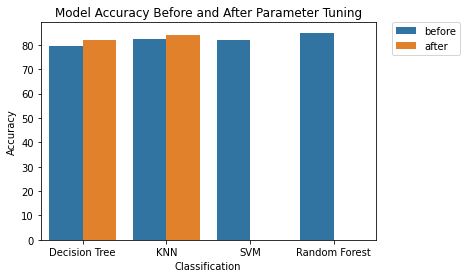

In [ ]:
ax2 = sns.barplot(x="Classification", y="Accuracy", hue="ParameterTuning", data=accDFPCA)
ax2.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
ax2.set(title = "Model Accuracy Before and After Parameter Tuning")

### **1.9. Conclusions**

In the report's file.


---